<a href="https://colab.research.google.com/github/anusurabhi/Data-Science/blob/main/Classification%20advanced%20using%20cancer%20cell%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('sample_data/cancer_classification.csv')

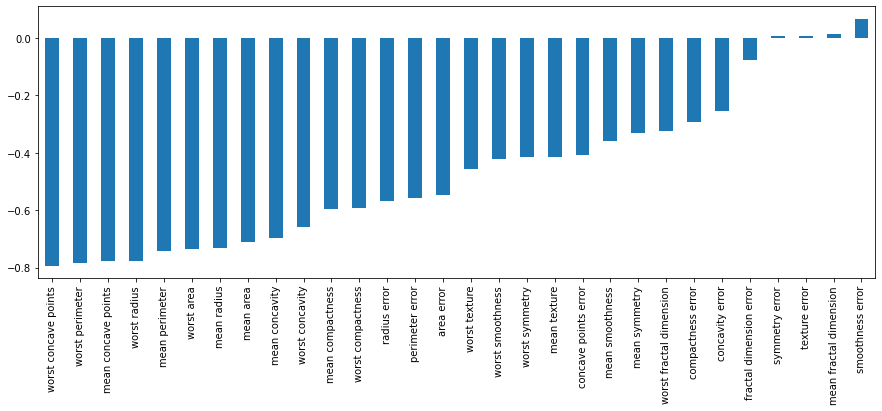

In [24]:
plt.figure(figsize=(15,5))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

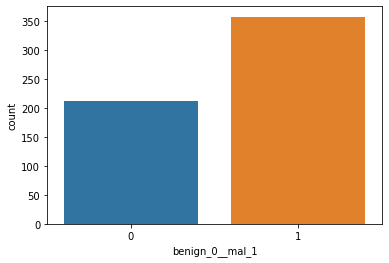

In [16]:
sns.countplot(x='benign_0__mal_1', data=df)

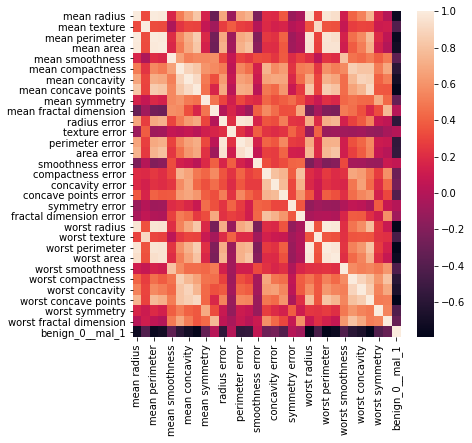

In [31]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr())

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [36]:
X_train.shape

(426, 30)

In [38]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(5,activation='relu'))

#The last layer must have an activation function sigmoid due to this is a binary classification problem
model.add(Dense(1, activation='sigmoid'))

#Here the loss funtion is binary_crossentropy because this is a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600)


Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6830 - val_loss: 0.6627
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6462 - val_loss: 0.6122
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5902 - val_loss: 0.5425
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5164 - val_loss: 0.4501
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4242 - val_loss: 0.3553
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3306 - val_loss: 0.2673
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2548 - val_loss: 0.2157
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2091 - val_loss: 0.1829
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1779 - val_loss: 0.1472
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1556 - val_loss: 0.1350
Epoch 11

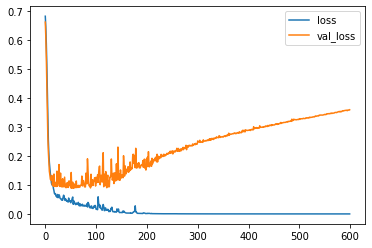

In [39]:
losses = pd.DataFrame(model.history.history)
losses.plot()